# Ripley's K Demo: 02 K test
* Use previously generated point process for Ripley's K test 
* The default size of point process generator is 20 x 20
* Please visit the code on my [GitHub](https://github.com/eufmike/Ripleys_K_function_demo)

In [1]:
# denpendency 
import os, sys
import scipy.stats
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import spatialstat.ppsim as ppsim
import spatialstat.spatialpattern as spatialpattern

%load_ext autoreload
%autoreload 2

In [2]:
# define IO dir
path = '.'
opdir = os.path.join(path, 'output')
opdir_csv = os.path.join(opdir, 'csv')
opdir_fig = os.path.join(opdir, 'figure')

# load point processes
filename = 'P_PoissonPP_20'
inputpath = os.path.join(opdir_csv, filename + '.csv')
P_PoissonPP = pd.read_csv(inputpath)
P_PoissonPP = np.array(P_PoissonPP)

filename = 'P_ThomasPP_20'
inputpath = os.path.join(opdir_csv, filename + '.csv')
P_ThomasPP = pd.read_csv(inputpath)
P_ThomasPP = np.array(P_ThomasPP)

## Running Ripley's K test
1. [GitHub](https://github.com/eufmike/Ripleys_K_function_demo)
2. Define maximum radius (rmax) in Ripley's K test (the maximum distance $t$)
3. Instead of using edge correction, the current code offset the maximum radius from the edge, and only perform K test in offset region.
4. run `spatialpattern.spest` and return K_r, L_r, H_r, RList, densitylist. 

In [3]:
# Define offset region
rmax = 5
Dx = 20
Dy = 20
xmin = 0 + rmax
xmax = Dx - rmax
ymin = 0 + rmax
ymax = Dx - rmax

# Create offset point pattern
# add the idx as the third dimension
P_PoissonPP_center = ppsim.xyroi_idx(P_PoissonPP, xmin, xmax, ymin, ymax)
P_ThomasPP_center = ppsim.xyroi_idx(P_ThomasPP, xmin, xmax, ymin, ymax)

In [4]:
P_PoissonPP_density = ppsim.xydensity(P_PoissonPP, Dx = Dx) [0]
P_ThomasPP_density = ppsim.xydensity(P_ThomasPP, Dx = Dx) [0]
print("The density of Poisson PP: {}".format(P_PoissonPP_density))
print("The density of Thomas PP: {}".format(P_ThomasPP_density))

The density of Poisson PP: 0.995
The density of Thomas PP: 4.745


## Ripley's K for Poisson PP

In [5]:
K_r, L_r, H_r, RList, densitylist = spatialpattern.spest(input_array_ref = P_PoissonPP_center, 
                        input_array_all = P_PoissonPP,
                        function = 'all',
                        density = P_PoissonPP_density,
                        rstart = 0, rend = 5, rstep = 0.01)

--------------------------
Function: all
Range: 0 - 5
Rstep: 0.01
Pointcountref: 92
Density: 0.995
--------------------------
Done
--------------------------


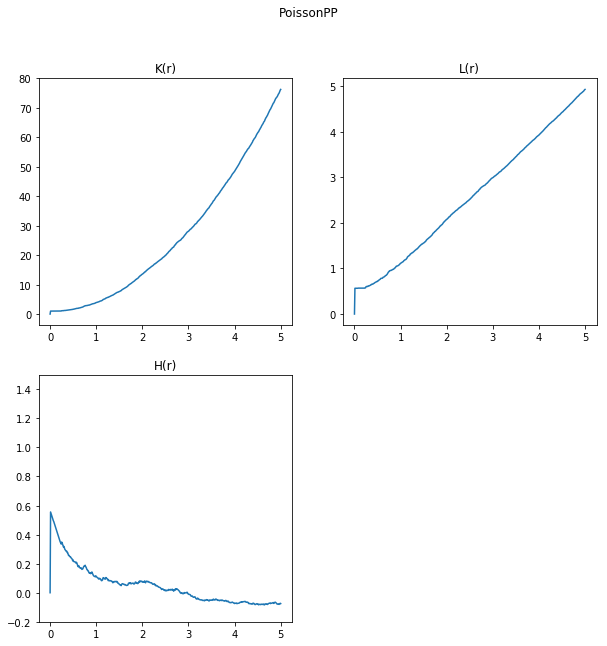

In [6]:
# plot
fig = plt.figure(figsize= (10, 10))
plotsize_x = 20.0
plotsize_y = 20.0
fig.suptitle('PoissonPP')

plot_1 = plt.subplot(221)
plot_1.set_title('K(r)')
plot_1.plot(RList, K_r)
plot_2 = plt.subplot(222)
plot_2.set_title('L(r)')
plot_2.plot(RList, L_r)
plot_3 = plt.subplot(223)
plot_3.set_title('H(r)')
plot_3.set_ylim(-0.2, 1.5)
plot_3.plot(RList, H_r)

## Ripley's K for Thomas PP

In [7]:
K_r, L_r, H_r, RList, densitylist = spatialpattern.spest(input_array_ref = P_ThomasPP_center, \
                        input_array_all = P_ThomasPP, \
                        function = 'all', \
                        density = P_ThomasPP_density, \
                        rstart = 0, rend = 5, rstep = 0.01)

--------------------------
Function: all
Range: 0 - 5
Rstep: 0.01
Pointcountref: 410
Density: 4.745
--------------------------
Done
--------------------------


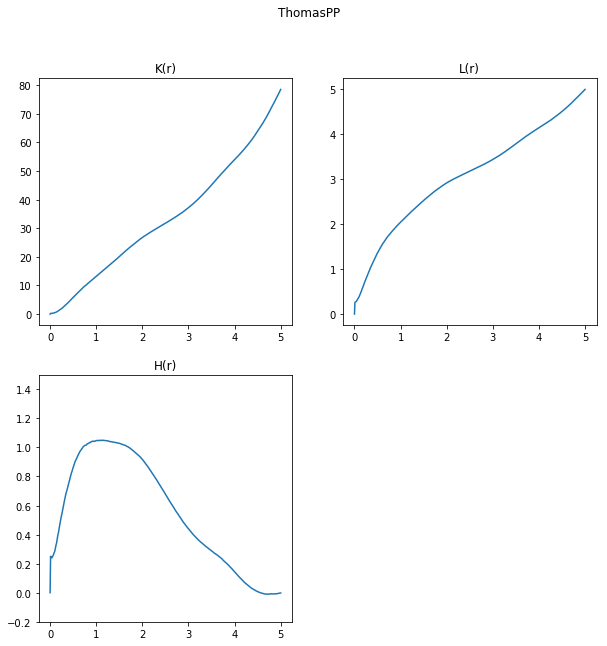

In [8]:
# plot
fig = plt.figure(figsize= (10, 10))
plotsize_x = 20.0
plotsize_y = 20.0
fig.suptitle('ThomasPP')

plot_1 = plt.subplot(221)
plot_1.set_title('K(r)')
plot_1.plot(RList, K_r)
plot_2 = plt.subplot(222)
plot_2.set_title('L(r)')
plot_2.plot(RList, L_r)
plot_3 = plt.subplot(223)
plot_3.set_title('H(r)')
plot_3.set_ylim(-0.2, 1.5)
plot_3.plot(RList, H_r)

## Conclusion
By comparing these results, we can see the Ripley's K test is able to reflect the culstering effect. This feature allow researcher to understand the relationship between distance and density, normalized by complete spatial randomness (CSR). 